In [1]:
import sys 

sys.path.append('./project_playground/QEC-with-spin-qubits/')

In [2]:
from RotatedSurfaceCode import RotatedSurfaceCode
from SurfaceCode3CX import SurfaceCode3CX
from XZZXCode import XZZXCode
from HeavyHEXFloquetColorCode import HeavyHexFloquetColorCode
from HeavyHEXHoneycombFloquetCode import HeavyHexHoneycombFloquetCode
from XYZ2Code import XYZ2Code
import plot_utils

import matplotlib.pyplot as plt
import numpy as np
import json
from scipy.optimize import fsolve
from math import comb


In [ ]:
T1 = 3_300 #us
T2 = 50 #T2 of an idling qubit with arbitrary dynamical decoupling protocol 
Fidelity_RO = 0.99
Readout_time = 6
Fidelity_init = 0.995
Init_time = 2
Fidelity_1Q = 0.996
Fidelity_2Q = 0.996

pT1 = (1-np.exp(-(Readout_time+Init_time)/T1))/4 #relaxation, assuming exponential decay
pT2 = (1-np.exp(-(Readout_time+Init_time)**2/T2**2))/2 - (1-np.exp(-(Readout_time+Init_time)/T1))/4 #dephasing, assuming Gaussian decay
pRR = (1-Fidelity_RO)*Fidelity_init + (1-Fidelity_init)*Fidelity_RO
pG1 = 1-Fidelity_1Q
pG2 = 1-Fidelity_2Q

# pR = 15/31*pRR
f = lambda pR: sum([comb(2,i)*(8*pR/15)**i*(1-8*pR/15)**(2-i)*pR**j*(1-pR)**(1-j) for i in range(3) for j in range(2) if i+j%2])-pRR
pR = fsolve(f,pRR)[0]#inverting the formula of pRR(pR)
etaT = pT2/pT1
pT = pT1 + pT2
etaG= pG2/pG1
pG = (pG1 + pG2)/2
p_physR = np.sqrt(pG**2 + pT**2 + pR**2)
phi = np.arctan2(pT,pG)
thetaR = np.arctan2(pR,np.sqrt(pT**2 + pG**2))
p_physR

UnboundLocalError: cannot access local variable 'e_connectivity' where it is not associated with a value

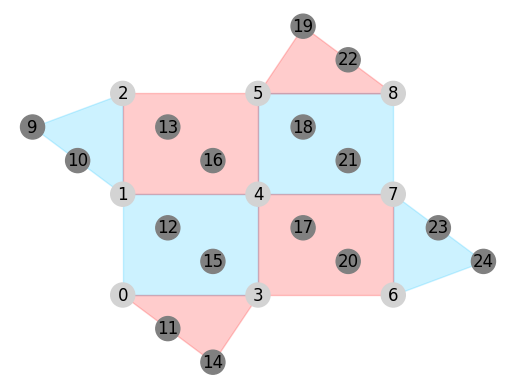

In [6]:
rsc = RotatedSurfaceCode(d=3)
rsc.draw_lattice()

UnboundLocalError: cannot access local variable 'e_connectivity' where it is not associated with a value

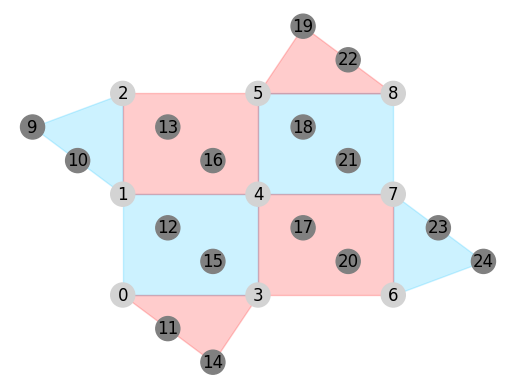

In [5]:
rsc.initialize_stim_circuit()